In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events = pd.read_csv("data/events.csv", dtype = {"event_id": np.int16, "application_id": np.int16})


/home/sol/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
events.memory_usage(deep=True).sum()

986807484

In [4]:
events['date']=pd.to_datetime(events['date'])
del events['event_uuid']
events['wifi']=events['wifi'].astype('bool')
events['connection_type']=events['connection_type'].astype('category')
del events['trans_id']

In [5]:
events.memory_usage(deep=True).sum()

316792078

In [6]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,3.258215e+18,7.164321e+18,NaN,2.248157e+17,5.516623e+18,7.531669e+18,True,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,3.258215e+18,7.164321e+18,NaN,2.248157e+17,9.977660e+17,7.531669e+18,True,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,3.258215e+18,7.164321e+18,NaN,2.248157e+17,5.516623e+18,7.531669e+18,True,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,2.551781e+18,7.164321e+18,NaN,2.248157e+17,8.561153e+18,7.531669e+18,True,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,6.959330e+18,7.164321e+18,NaN,2.248157e+17,8.731902e+17,7.531669e+18,True,Cable/DSL,2894495631302821483,3.301378e+18


In [7]:
events['date'].describe()

count                        2494423
unique                       2488829
top       2019-03-12 14:36:58.017000
freq                               3
first     2019-03-05 00:00:00.255000
last      2019-03-13 23:59:59.984000
Name: date, dtype: object

In [8]:
events['event_id'].describe()

count    2.494423e+06
mean     9.970445e+01
std      1.070903e+02
min      0.000000e+00
25%      2.200000e+01
50%      3.100000e+01
75%      1.610000e+02
max      7.120000e+02
Name: event_id, dtype: float64

ValueError: max must be larger than min in range parameter.

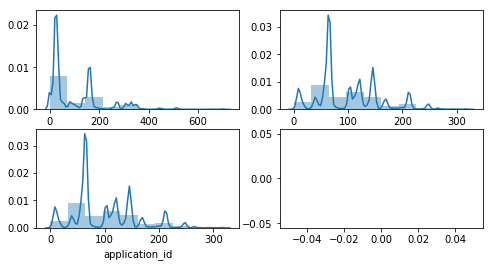

In [9]:
f, ax = plt.subplots(2,2,figsize=(8,4))
vis1 = sns.distplot(events["event_id"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(events["application_id"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(events["application_id"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(events["device_city"],bins=10, ax=ax[1][1])

In [10]:
grupo_event_id=events.groupby(['event_id','device_language'])['event_id'].count().sort_values(ascending=False).rename("Cantidad").reset_index()
grupo_event_id['Total']=grupo_event_id['Cantidad'].sum()

grupo_event_id['%Total']=grupo_event_id['Cantidad']/grupo_event_id['Total']*100
grupo_event_id=grupo_event_id.head(10)
grupo_event_id

,event_id,device_language,Cantidad,Total,%Total
0,22,6.977049e+18,386864,2406604,16.075100
1,31,6.804428e+18,283738,2406604,11.789975
2,161,3.301378e+18,210336,2406604,8.739951
3,22,9.028383e+18,186469,2406604,7.748221
4,1,3.301378e+18,134833,2406604,5.602625
5,31,6.977049e+18,98270,2406604,4.083347
6,138,9.028383e+18,88882,2406604,3.693254
7,162,3.301378e+18,81592,2406604,3.390338
8,329,6.804428e+18,53186,2406604,2.210002
9,310,3.301378e+18,38999,2406604,1.620499


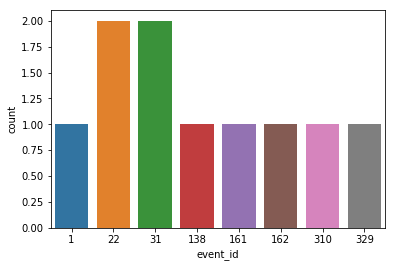

In [11]:
sns.countplot(x='event_id', data=grupo_event_id)

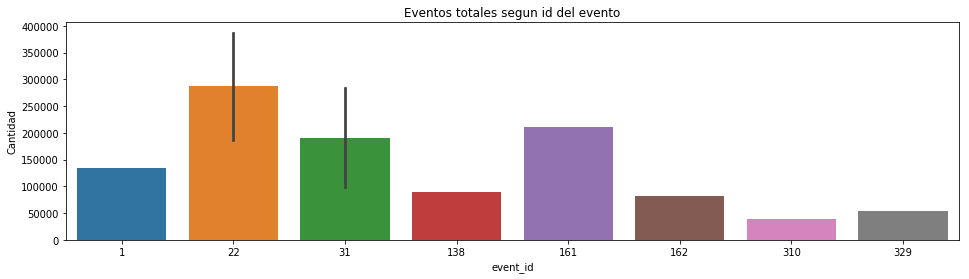

In [12]:
ax = sns.barplot(x='event_id', y='Cantidad', data=grupo_event_id)
ax.set_title('Eventos totales segun id del evento')
ax.figure.set_size_inches(16, 4)

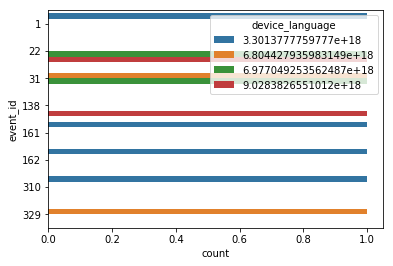

In [13]:
sns.countplot(y="event_id", hue="device_language", data=grupo_event_id);

In [14]:
import matplotlib.pyplot as plt
 
# Basic correlogram
#sns.pairplot(events)
#sns.plt.show()


In [15]:
grupo_event_id=events.groupby(['event_id','device_language'])['event_id'].count().sort_values(ascending=False).rename("Cantidad").reset_index()
grupo_event_id['Total']=grupo_event_id['Cantidad'].sum()

grupo_event_id['%Total']=grupo_event_id['Cantidad']/grupo_event_id['Total']*100
grupo_event_id=grupo_event_id.head(100)
grupo_event_id.head()

,event_id,device_language,Cantidad,Total,%Total
0,22,6.977049e+18,386864,2406604,16.075100
1,31,6.804428e+18,283738,2406604,11.789975
2,161,3.301378e+18,210336,2406604,8.739951
3,22,9.028383e+18,186469,2406604,7.748221
4,1,3.301378e+18,134833,2406604,5.602625


/home/sol/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


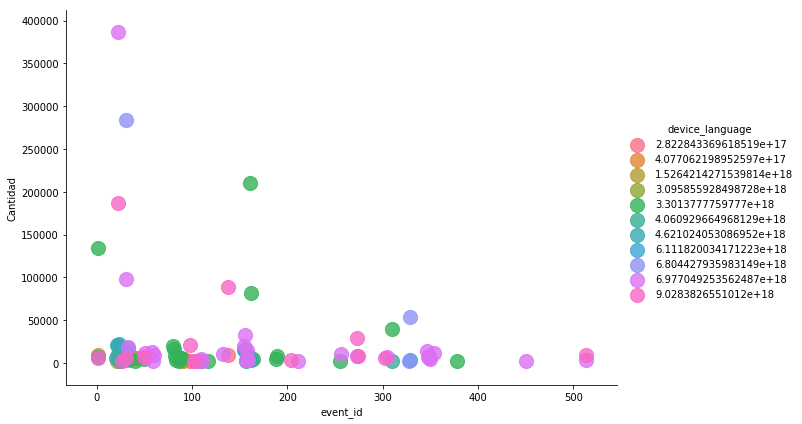

In [16]:
vis7 = sns.lmplot(data = grupo_event_id, x = "event_id", y = "Cantidad",fit_reg=False, hue = "device_language",size = 6, aspect=1.5, scatter_kws = {'s':200}, )


In [17]:
events['año'] = pd.DatetimeIndex(events['date']).year
events['mes'] =events['date'].dt.month
events['día'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
events['minuto'] = events['date'].dt.minute
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,device_os,wifi,connection_type,ip_address,device_language,año,mes,día,hora,minuto
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.531669e+18,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.531669e+18,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.531669e+18,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.531669e+18,True,Cable/DSL,6324037615828123965,4.077062e+17,2019,3,5,0,9
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.531669e+18,True,Cable/DSL,2894495631302821483,3.301378e+18,2019,3,9,21,0


In [18]:
grupo_events_por_hora=events.groupby(['event_id','diaSemana','hora'])['event_id'].count().sort_values(ascending=False).rename("Cantidad Eventos").reset_index()
grupo_events_por_hora=grupo_events_por_hora.head(100) 
grupo_events_por_hora.head()

KeyError: 'diaSemana'

In [19]:
vis7 = sns.lmplot(data = grupo_events_por_hora, x = "hora", y ="Cantidad Eventos",fit_reg=False, hue = "event_id",size = 6, aspect=1.5, scatter_kws = {'s':200}, )


NameError: name 'grupo_events_por_hora' is not defined

In [20]:
events['diaSemana'] = events['date'].dt.weekday_name
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,wifi,connection_type,ip_address,device_language,año,mes,día,hora,minuto,diaSemana
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,6324037615828123965,4.077062e+17,2019,3,5,0,9,Tuesday
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,True,Cable/DSL,2894495631302821483,3.301378e+18,2019,3,9,21,0,Saturday


In [21]:
grupo_events_por_dia=events.groupby(['event_id','diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Totalevents").reset_index()
grupo_events_por_dia.head()  

,event_id,diaSemana,Totalevents
0,22,Tuesday,130422
1,22,Wednesday,129990
2,31,Wednesday,98745
3,31,Tuesday,87741
4,22,Saturday,77156


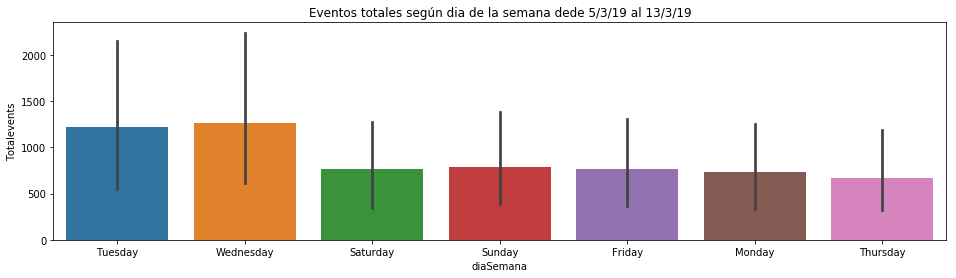

In [22]:
ax = sns.barplot(x='diaSemana', y='Totalevents', data=grupo_events_por_dia)
ax.set_title('Eventos totales según dia de la semana dede 5/3/19 al 13/3/19')
ax.figure.set_size_inches(16, 4)

In [23]:
grupo_events_por_dia=events.groupby(['event_id','diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Totalevents").reset_index()
grupo_events_por_dia=grupo_events_por_dia.head(50) 

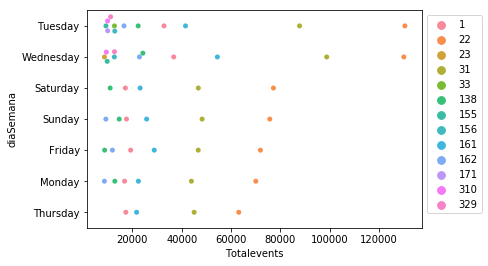

In [24]:
vis9 = sns.swarmplot(x="Totalevents", y="diaSemana", hue="event_id", data=grupo_events_por_dia)
vis9.legend_.remove()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

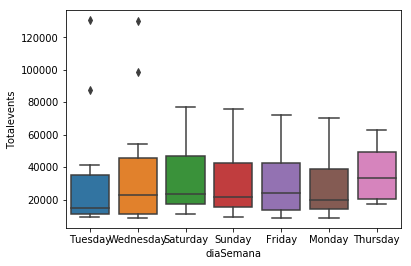

In [25]:
vis5 = sns.boxplot(data = grupo_events_por_dia, y = "Totalevents", x = "diaSemana")
fig = vis5.get_figure()
#fig.savefig("fig1.png")